# Assignment 2

## Objective of this assignment
The objective of this assignment is to get an understanding of the many ways data can be visualized. Upon completing this exercise you should be familiar with histograms, boxplots and scatter plots.


## ** Important: ** When handing in your homework:
+ Hand in the notebook **and nothing else** named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ **From this week on, we will deduct a point if you zip/tar/archive the notebook, especially if you include the data folder!** 
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Lisa] at `l.tostrams@science.ru.nl`


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 3.3
- Jonathon Shlens, *A tutorial on Principal Component Analysis* , https://arxiv.org/abs/1404.1100


## 2.1 Visualizing wine data (4.5 points)

In this part of the exercise we will consider two data sets related to red and white variants of the Portuguese "Vinho Verde" wine[1]. The data has been downloaded from http://archive.ics.uci.edu/ml/datasets/Wine+Quality. Only physicochemical and sensory attributes are available, i.e., there is no data about grape types, wine brand, wine selling price, etc. The data has the following attributes:

| #   |  Attribute      | Unit |
| --- |:--------------- |:---- |
| 1   | Fixed acidity (tartaric) | g/dm3 |
| 2   | Volatile acidity (acetic) | g/dm3 |
| 3   | Citric acid | g/dm3 |
| 4   | Residual sugar | g/dm3 |
| 5   | Chlorides | g/dm3 |
| 6   | Free sulfur dioxide | mg/dm3 |
| 7   | Total sulfur dioxide | mg/dm3 |
| 8   | Density | g/cm3 |
| 9   | pH | pH |
| 10  | Sulphates | g/dm3 |
| 11  | Alcohol | % vol. |
| 12  | Quality score | 0-10 |

Attributes 1-11 are based on physicochemical tests and attribute 12 on human judging. The data set has many observations that can be considered outliers and in order to carry out analyses it is important to remove the corrupt observations.

The aim of this exercise is to use visualization to identify outliers and remove these outliers from the data. It might be necessary to remove some outliers before other outlying observations become visible. Thus, the process of finding and removing outliers is often iterative. The wine data is stored in a MATLAB file, `Data/wine.mat`

*This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute,
http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.*

> 2.1.1a) (3pts)
1. Load the data into Python using the `scipy.io.loadmat()` function. 
2. This data set contains many observations that can be considered outliers. Plot a box plot and a histogram for each attribute to visualize the outliers in the data set. Use subplotting to nicely visualize these plots.
3. From prior knowledge we expect volatile acidity to be around 0-2 g/dm3, density to be close to 1 g/cm3, and alcohol percentage to be somewhere between 5-20% vol. We can safely identify the outliers for these attributes, searching for the values, which are a factor of 10 greater than the largest we expect. Identify outliers for volatile acidity, density and alcohol percentage, and remove them from the data set. This means that you should remove the entire sample from the dataset, not just for that attribute!
4. Plot new box plots and histograms for these attributes and compare them with initial ones.

> 
 + *You can use the `scipy.stats.zscore()` to standardize your data before you plot a boxplot.*
 + *You can use logical indexing to easily make a new dataset (for example $X\_filtered$, where the outliers are removed. This is much easier, and faster than methods like dropping, or selecting using a for loop or list comprehension. For more information, see: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html Take a look at the -Boolean or "mask" index arrays- section.*
 + *You can use the function `matplotlib.pyplot.subplots()` to plot several plots in one figure. A simple example an be found at: https://matplotlib.org/2.0.2/examples/pylab_examples/subplots_demo.html, take a look at the 2D subplot specifically. There is also an example of a subplot in the first assignment. If you're handy, you can devise a for loop which fills up the subplot area!* 
 + *The object in wine.mat is a dictionary. The attributes are stored in matrix $X$. Attribute names and class names are stored in the attributeNames object, which contain arrays, of which the first element contains the names*

**Make sure to take a look at the documentation of functions before you try and use them!**


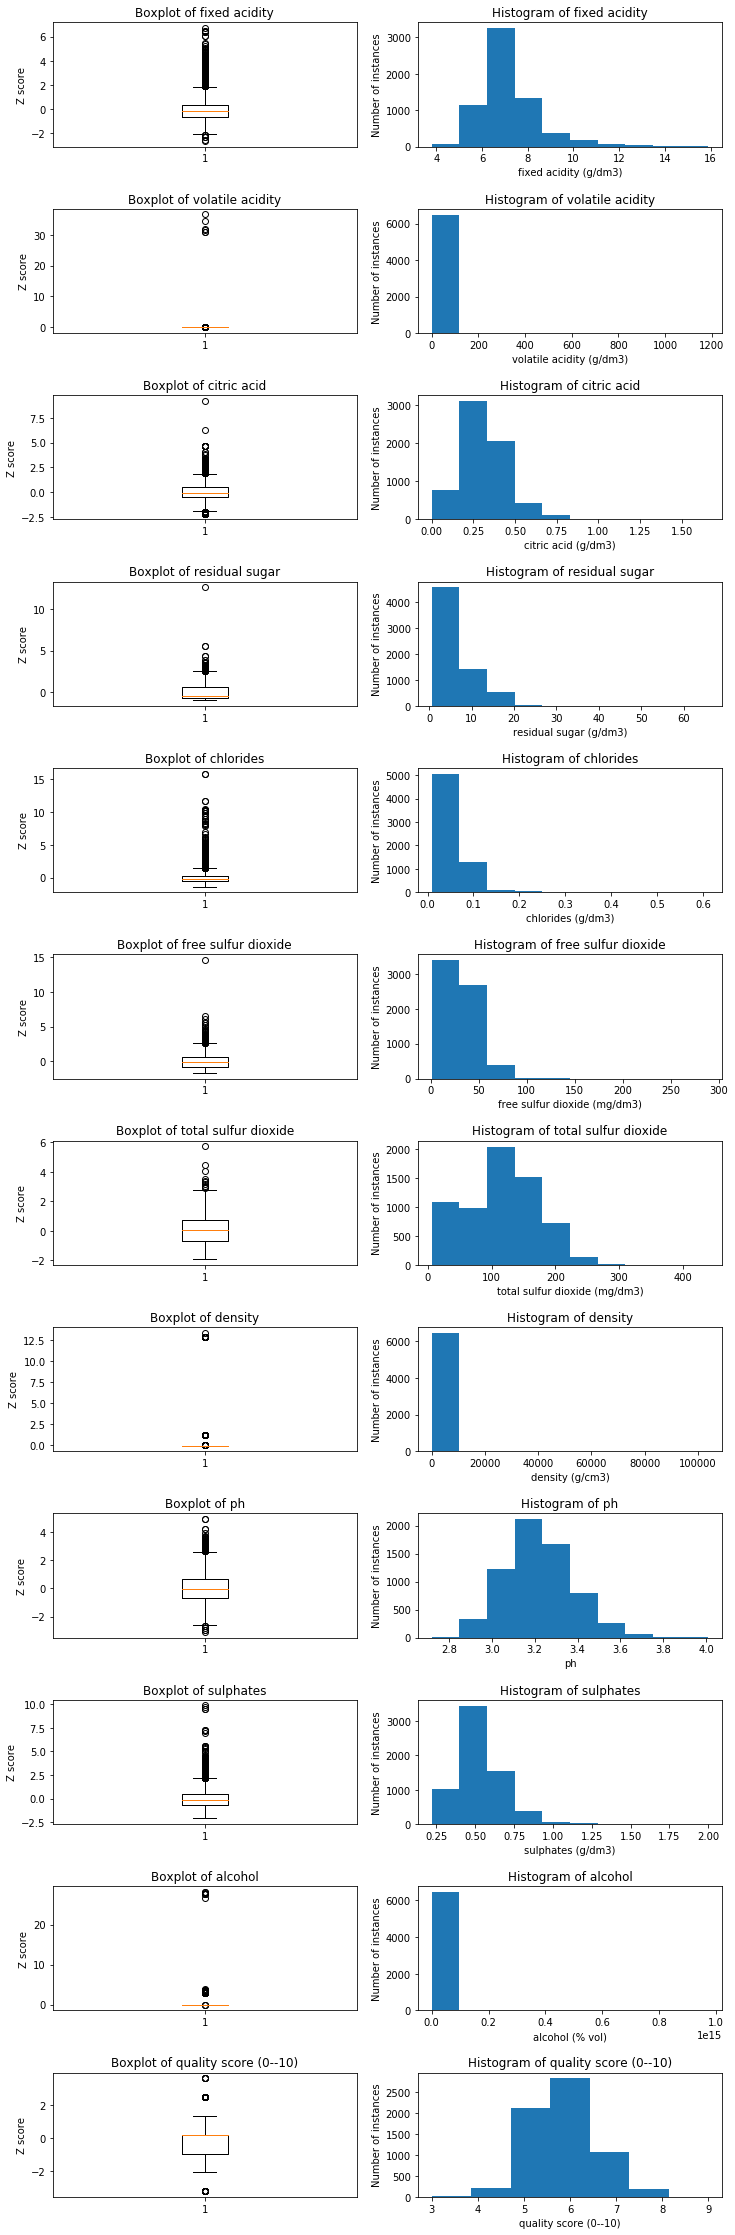

Figure 1: a number of graphs showing the attributes of wines in a wine quality dataset. 
 
 
 
 


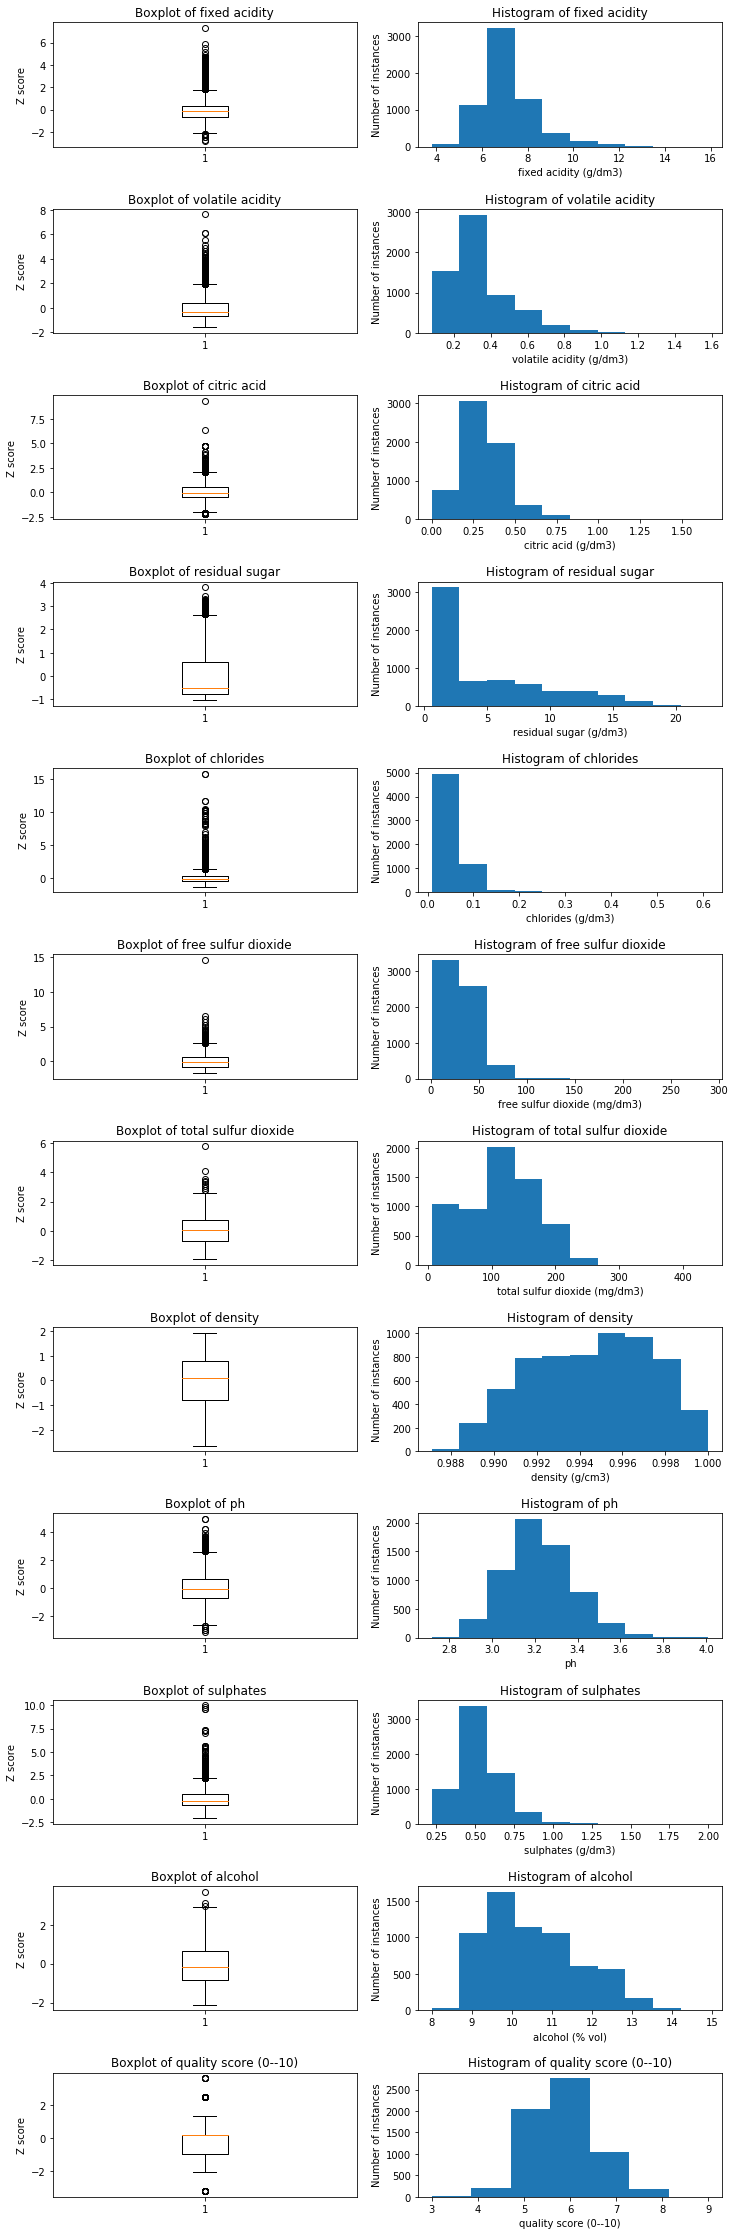

Figure 2: the same attributes as before, with outliers removed.


In [11]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.io
import scipy.stats


wineData = sp.io.loadmat(r'C:\Users\Gebruiker\Downloads\Assignment_2\Assignment_2\Data\wine.mat')
X = wineData['X']
XStandard = sp.stats.zscore(X)


#removing the [' '] and capital letter from the attribute names
cleanedAttributeNames = wineData['attributeNames'][0,:]
for i in range(len(cleanedAttributeNames)):
    cleanedAttributeNames[i] = str(cleanedAttributeNames[i]).lower()
    for r in ['[', ']', "'"]:
        cleanedAttributeNames[i] = cleanedAttributeNames[i].replace(r,"")
        
#making a version of the attribute names with units to use on the axes
CANWithUnits = []
for i in range(len(cleanedAttributeNames)):
    if i in range(5) or i ==9:
        CANWithUnits.append(cleanedAttributeNames[i] + ' (g/dm3)')
    elif i in [5,6]:
        CANWithUnits.append(cleanedAttributeNames[i] + ' (mg/dm3)')
    elif i == 7:
        CANWithUnits.append(cleanedAttributeNames[i] + ' (g/cm3)')
    elif i == 10:
        CANWithUnits.append(cleanedAttributeNames[i] + ' (% vol)')
    else:
        CANWithUnits.append(cleanedAttributeNames[i])
    


fig,WinePlots = plt.subplots(len(X[1]),2,figsize=(12,40))
for i in range(12):
    WinePlots[i,0].boxplot(XStandard[:,i])
    WinePlots[i,0].set_title('Boxplot of ' + cleanedAttributeNames[i])
    WinePlots[i,0].set_ylabel('Z score')
    
    if i == 11:
        WinePlots[i,1].hist(X[:,i], bins = 7) #Quality score looked silly with bins that had no whole numbers in them
    else:
        WinePlots[i,1].hist(X[:,i])
    WinePlots[i,1].set_title('Histogram of ' + cleanedAttributeNames[i])
    WinePlots[i,1].set_xlabel(CANWithUnits[i])
    WinePlots[i,1].set_ylabel('Number of instances')
    
fig.subplots_adjust(hspace = 0.5)
plt.show()
print('Figure 1: a number of graphs showing the attributes of wines in a wine quality dataset. \n \n \n \n ')


XFiltered = X[X[:,1] < 20]
XFiltered = XFiltered[XFiltered[:,7] < 10]
XFiltered = XFiltered[XFiltered[:,10] < 200]
XFilterStandard = sp.stats.zscore(XFiltered)

fig,WinePlots2 = plt.subplots(len(X[1]),2,figsize=(12,40))
for i in range(12):
    WinePlots2[i,0].boxplot(XFilterStandard[:,i])
    WinePlots2[i,0].set_title('Boxplot of ' + cleanedAttributeNames[i])
    WinePlots2[i,0].set_ylabel('Z score')
    
    if i == 11:
        WinePlots2[i,1].hist(XFiltered[:,i], bins = 7) #Quality score looked silly with bins that had no whole numbers in them
    else:
        WinePlots2[i,1].hist(XFiltered[:,i])
    WinePlots2[i,1].set_title('Histogram of ' + cleanedAttributeNames[i])
    WinePlots2[i,1].set_xlabel(CANWithUnits[i])
    WinePlots2[i,1].set_ylabel('Number of instances')
    
fig.subplots_adjust(hspace = 0.5)
plt.show()
print('Figure 2: the same attributes as before, with outliers removed.')


> 2.1.1b (0.5pts)
Why do we need to standardize the data after removing the outliers? Give the -statistical- reason, not just the practical reason. 

> 2.1.2 (1pt) Make scatter plots between attributes and wine quality as rated by human judges. Can you manually identify any clear relationship between the attributes of the wine and wine quality? Which values of these attributes are associated with high quality wine? Use the correlation coefficients to substantiate your answers. Make sure to use the data where the outliers are removed 
+ *You can calculate the correlation coefficient using the `scipy.stats.pearsonr()` function to measure the strength of association.*

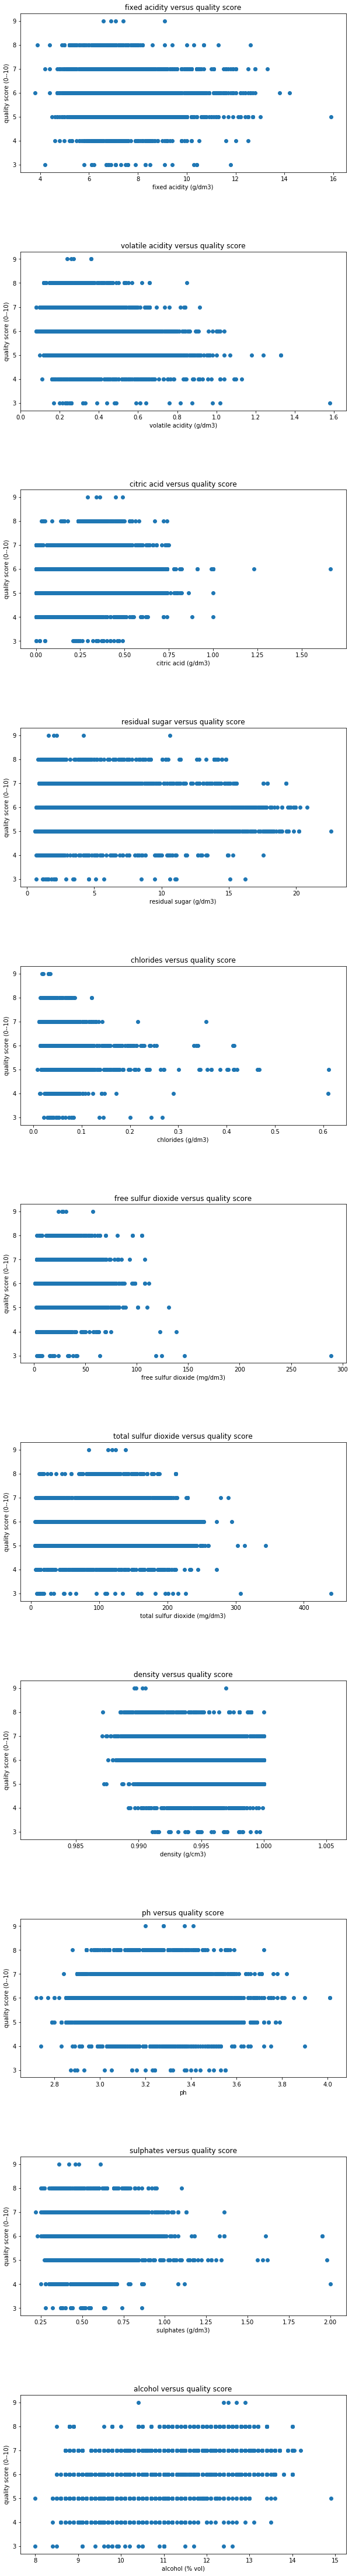

Figure 1: a number of graphs plotting various attributes of wine against the test score that wine was given


In [2]:
fig,WinePlots3 = plt.subplots(11, 1, figsize=(10,80))
WinePlots3 = WinePlots3.ravel()

#I decided to only plot 500 points instead of all of them, to make the plots easier to read.
#Before doing this however, I checked if the first 500 values were representative of the entire set.
#for i in range(12):
#    print('Mean ' + cleanedAttributeNames[i] + ': ' + str(np.mean(XFiltered[:,i])))
#    print('Mean first 500 ' + cleanedAttributeNames[i] + ': ' + str(np.mean(XFiltered[:500,i])))
#    print('Standard deviation ' + cleanedAttributeNames[i] + ': ' + str(np.std(XFiltered[:,i])))
#    print('Standard deviation first 500 ' + cleanedAttributeNames[i] + ': ' + str(np.std(XFiltered[:500,i])))

# Having done that, it's pretty clear that the first 500 values do not represent the dataset properly and it was all a waste of time :(

for i in range(11):
    WinePlots3[i].scatter(XFiltered[:,i],XFiltered[:,11])
    WinePlots3[i].set_title(cleanedAttributeNames[i] +' versus quality score')
    WinePlots3[i].set_ylabel(CANWithUnits[11])
    WinePlots3[i].set_xlabel(CANWithUnits[i])
    

    
fig.subplots_adjust(hspace = 0.5)
plt.show()
print('Figure 1: a number of graphs plotting various attributes of wine against the test score that wine was given')


----
Looking at the graphs, high volatile acidity and sulfur dioxide seems to lead to worse wine. As do high sulfates. 
There also looks to be a slight positive relation between alcohol and quality.
None of these effects are very clear though.

Let's look at the numbers

----

In [3]:
for i in range(11):
    print('Pearson coefficient and p-value for ' + cleanedAttributeNames[i] + ' and wine quality:')
    print(sp.stats.pearsonr(XFiltered[:,i],XFiltered[:,11]))
    print('\n')

Pearson coefficient and p-value for fixed acidity and wine quality:
(-0.07668526520453652, 1.0847899728777514e-09)


Pearson coefficient and p-value for volatile acidity and wine quality:
(-0.26230590578350776, 1.0724803118587711e-99)


Pearson coefficient and p-value for citric acid and wine quality:
(0.0890221181546118, 1.4330992086587045e-12)


Pearson coefficient and p-value for residual sugar and wine quality:
(-0.03215392730963386, 0.010676798571678045)


Pearson coefficient and p-value for chlorides and wine quality:
(-0.19914164479762572, 2.1198960802505528e-57)


Pearson coefficient and p-value for free sulfur dioxide and wine quality:
(0.05516006485585848, 1.1756681578183794e-05)


Pearson coefficient and p-value for total sulfur dioxide and wine quality:
(-0.03971034037910721, 0.0016130889003013028)


Pearson coefficient and p-value for density and wine quality:
(-0.3196176972872714, 1.0807901465291248e-149)


Pearson coefficient and p-value for ph and wine quality:
(0.02030

----
So looking at the numbers, my guesses about what affected the wine quality based on the graphs were mostly wrong. 
Alcohol level does have a strong effect on the quality (by far the biggest) followed by density which I would never have
expected looking at the graphs.
I was right about volatile acidity affecting the wine quality negatively but wrong about the sulphur dioxides, those don't 
seem to affect quality much.

----

## 2.2 Visualizing the handwritten digits (4 points)

In this part of the exercise we will analyse the famous *mnist* handwritten digit dataset from: http://yann.lecun.com/exdb/mnist/.

> 2.2.1 (4pts)
1. Load zipdata.mat by using the loadmat function. There are two data sets containing handwritten digits: *testdata* and *traindata*. Here, we will only use *traindata*. The first column in the matrix *traindata* contains the digit (class) and the last 256 columns contain the pixel values.
2. Create the data matrix *X* and the class index vector *y* from the data. Remove
the digits with the class index 2-9 from the data, so only digits belonging to
the class 0 and 1 are analyzed. (remember logical indexing!) 
3. Visualize the first 10 digits as images. (take a look at the example code)
Next, compute the principal components (PCA) of the data matrix. Now, using the PCA model, create a new data matrix $Z$ by projecting $X$ onto the space spanned by the loadings $V$. The new data matrix should have 4 attributes corresponding to PC1-PC4.  Use subplotting to show the digits and their reconstructed counterparts in an orderly manner.
4. Reconstruct the initial data using PC1-PC4 into a new matrix called $W$. Visualize the first 10 digits as images for the reconstructed data and compare them with images for the original data.
5. Make a 4-by-4 subplot of scatter plots of each possible combination projection onto PC1 to PC4 (contained in $Z$) against each other. You can leave the diagonal blank.  Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
6. Make a 3-dimensional scatter plot of the projections onto the first three principal components PC1-PC3 (contained in $Z$). Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
7. What can you conclude from the various scatterplots about the PCs and the way they separate the data?

> **Hints:**
+ *The below example code can help you visualize digits as images.*
+ *See Assignment 1 if you can not recall how to compute a PCA.*
+ *Keep in mind that numpy.linalg.svd() returns the transposed **V<sup>T</sup>** matrix as output.*
+ *You can use **Z** = **Y** $*$ **V**[:,:4] to project the data onto the first four PCs. Don't forget that the $*$ operator does not perform matrix multiplication for numpy arrays!*
+ *To reconstruct the data from projection you can use the following formula: **W** = **Z**&ast;**V**[:,:4]<sup>T</sup> + **μ**. *
+ *You can take a look at the example_figure.ipynb notebook to see how you can easily plot multiple classes and color them correspondingly.* 
+ *It is advisable to make a for-loop to generate the 2D scatter plots, this saves a lot of time. It is an important skill to master if you want to easily modify your work later on, for example when correcting mistakes, or when you want to modify each plot in the same manner.* 


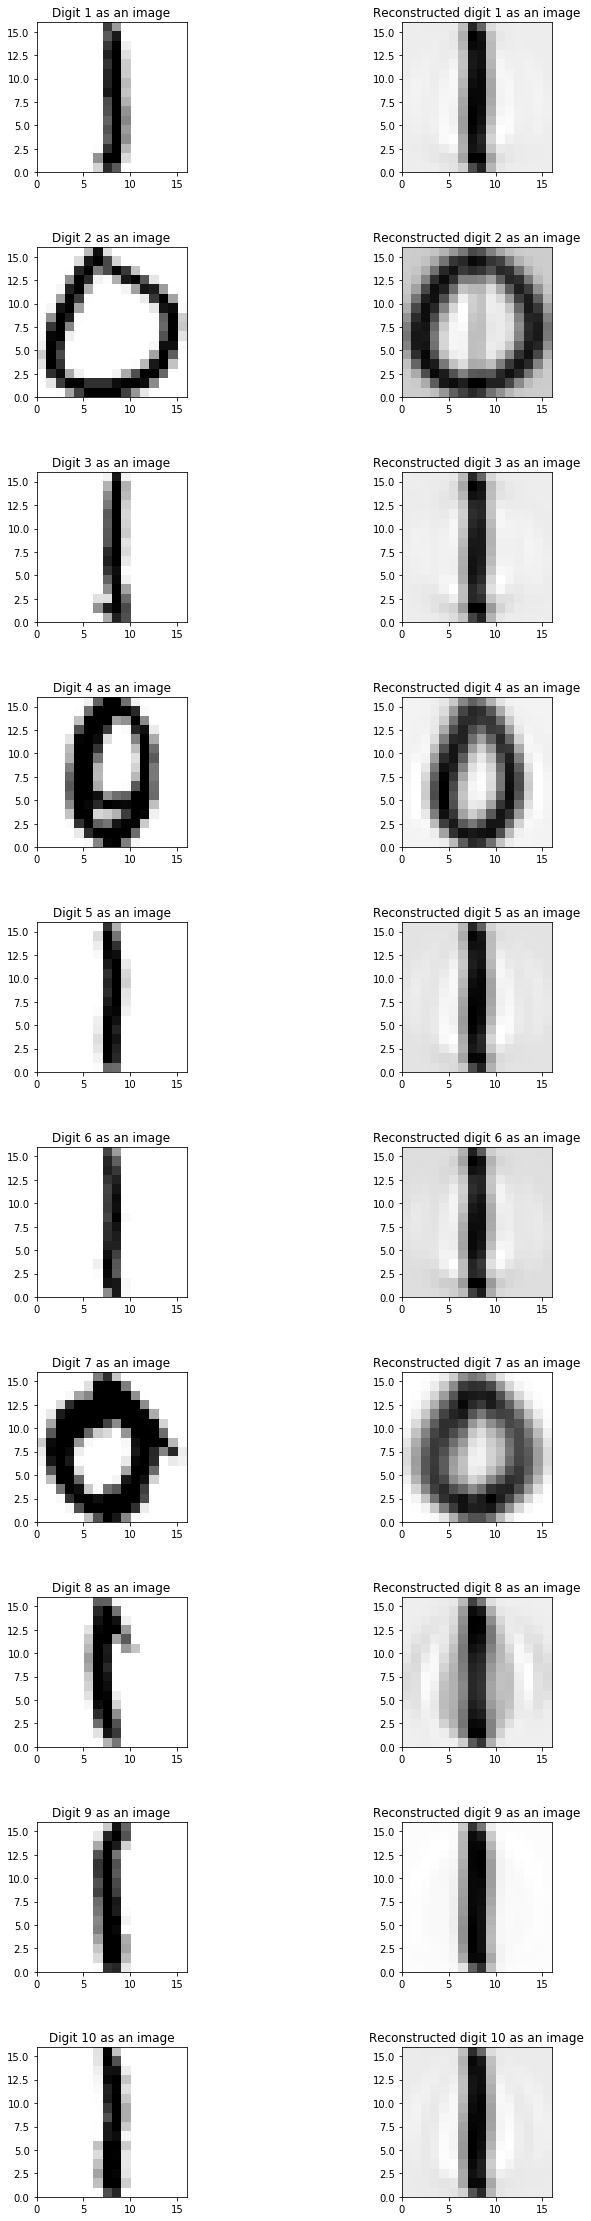

A figure showing handwritten digits on the left, and on the right the same digits reconstructed using only the first 4 principal components of a principal component analysis


In [4]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
from numpy import reshape

digitData = sp.io.loadmat(r'C:\Users\Gebruiker\Downloads\Assignment_2\Assignment_2\Data\zipdata.mat')

trainData = digitData['traindata']
trainDataFiltered = trainData[trainData[:,0] < 2] 
X = trainDataFiltered[:,1:]
y = trainDataFiltered[:,0]


#Doing the PCA
Y = X - np.mean(X, axis = 0)
U, S, Vh = np.linalg.svd(Y)

Z = Y@(np.transpose(Vh[:4]))
W = Z@Vh[:4] + np.mean(X, axis = 0)


# Using the example code from the updated assigment
fig,DigitPlots = plt.subplots(10,2,figsize=(12,40))
for i in range(10):
    I = reshape(X[i,:],(16,16))
    DigitPlots[i,0].imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
    DigitPlots[i,0].set_title('Digit ' + str(i+1) + ' as an image')
    
    J = reshape(W[i,:],(16,16))
    DigitPlots[i,1].imshow(J, extent=(0,16,0,16), cmap=cm.gray_r);
    DigitPlots[i,1].set_title('Reconstructed digit ' + str(i+1) + ' as an image')
    
fig.subplots_adjust(hspace = 0.5)
plt.show()
print('A figure showing handwritten digits on the left, and on the right the same digits reconstructed using only the first 4 principal components of a principal component analysis')



----
Comparing the reconstructed digits with the originals it's quite clear that the reconstructed digits are a lot "prettier". That is to say, they are more symmetrical and lack the random differences of the originals.

----

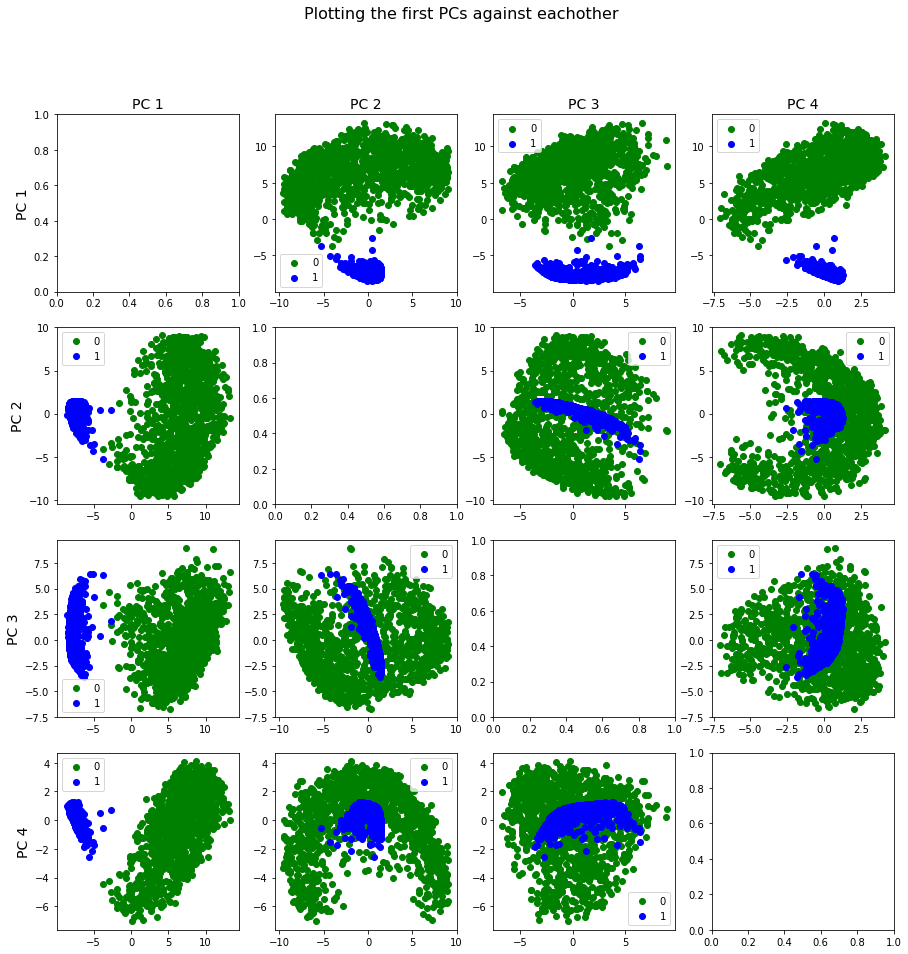

A figure showing scatterplots of the first 4 principal components plotted against each other. Points belonging to a "zero" are plotted in green and points belonging to a "one" in blue

 



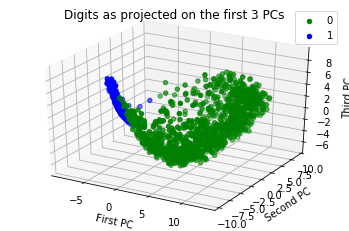

A 3 dimensional scatterplot of data from a handwritten digits dataset as projected on its first three Principal components. Points belonging to a "zero" are shown in green, points belonging to a "one" are shown in blue


In [5]:
#Making two new matrices, one including all the 'ones', the other including all the 'zeroes' 
#So I can make them different colours in the graphs
ZOnes = Z[y[:]==1]
ZZeros = Z[y[:]==0]

fig,PCScatter = plt.subplots(4,4,figsize=(15,15))
for i in range(4):
    for j in range(4):
        if i != j:
            PCScatter[i,j].scatter(ZZeros[:,j],ZZeros[:,i],color = 'g', label = '0')
            PCScatter[i,j].scatter(ZOnes[:,j],ZOnes[:,i],color = 'b', label = '1')
            PCScatter[i,j].legend()
        if i == 0:
            PCScatter[i,j].set_title('PC ' + str(j + 1), fontsize = 14)
        if j == 0:
            PCScatter[i,j].set_ylabel('PC ' + str(i + 1), fontsize = 14)

fig.suptitle('Plotting the first PCs against eachother', fontsize = 16)
plt.show()
print('A figure showing scatterplots of the first 4 principal components plotted against each other. Points belonging to a "zero" are plotted in green and points belonging to a "one" in blue')
print('\n \n')


from mpl_toolkits import mplot3d
#The 3D plot
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter3D(ZZeros[:,0],ZZeros[:,1],ZZeros[:,2],color = 'g', label = '0')
ax.scatter3D(ZOnes[:,0],ZOnes[:,1],ZOnes[:,2],color = 'b', label = '1')
ax.legend()
ax.set_xlabel('First PC')
ax.set_ylabel('Second PC')
ax.set_zlabel('Third PC')
ax.set_title('Digits as projected on the first 3 PCs')

plt.show()
print('A 3 dimensional scatterplot of data from a handwritten digits dataset as projected on its first three Principal components. Points belonging to a "zero" are shown in green, points belonging to a "one" are shown in blue')

---
Looking at the scatterplots for the PCs, it's clear that the "ones" and "zeroes" are more divided on the first PC than on the later ones. I'd conclude from this that the first component defines whether are digit is a "one" or a "zero", and the other PCs mostly define the shape of that particular version of the digit.

---

## 2.3 Probability and Statistics (1.5 points)
The aim of this exercise is to learn how to calculate basic statistics in python.
> 2.3.1 (0.3pts) A study of a very limited population of Aliens reveals the following number of body appendages (limbs):
<center>2,3,6,8,11,18</center>
i. Find the mean $m$ and the standard deviation $\sigma$ of this population.
+ *You can use the methods numpy.ndarray.mean() and numpy.ndarray.std() to calculate the mean and standard deviation.*

In [6]:
limbs = np.array([2,3,6,8,11,18])

m = np.ndarray.mean(limbs)
sigma = np.ndarray.std(limbs)

print('The mean is '+ str(m))
print('The standard deviation is ' + str(sigma))

The mean is 8.0
The standard deviation is 5.385164807134504


> ii. (0.3pts) List all possible samples of two aliens without replacement, and find each mean. Do the same with samples of four aliens.
+ *You can use the method itertools.combinations(v,n) to find all possible samples of a vector v taking n elements at a time.*

In [7]:
import itertools as it

print('Samples of 2 aliens:')
comb2 = list(it.combinations(limbs,2))
for i in range(len(comb2)):
    print(str(comb2[i]) + ' with mean ' + str(np.mean(comb2[i])) )
    
print('\nSamples of 4 aliens:')
comb4 = list(it.combinations(limbs,4))
for i in range(len(comb4)):
    print(str(comb4[i]) + ' with mean ' + str(np.mean(comb4[i])) )

Samples of 2 aliens:
(2, 3) with mean 2.5
(2, 6) with mean 4.0
(2, 8) with mean 5.0
(2, 11) with mean 6.5
(2, 18) with mean 10.0
(3, 6) with mean 4.5
(3, 8) with mean 5.5
(3, 11) with mean 7.0
(3, 18) with mean 10.5
(6, 8) with mean 7.0
(6, 11) with mean 8.5
(6, 18) with mean 12.0
(8, 11) with mean 9.5
(8, 18) with mean 13.0
(11, 18) with mean 14.5

Samples of 4 aliens:
(2, 3, 6, 8) with mean 4.75
(2, 3, 6, 11) with mean 5.5
(2, 3, 6, 18) with mean 7.25
(2, 3, 8, 11) with mean 6.0
(2, 3, 8, 18) with mean 7.75
(2, 3, 11, 18) with mean 8.5
(2, 6, 8, 11) with mean 6.75
(2, 6, 8, 18) with mean 8.5
(2, 6, 11, 18) with mean 9.25
(2, 8, 11, 18) with mean 9.75
(3, 6, 8, 11) with mean 7.0
(3, 6, 8, 18) with mean 8.75
(3, 6, 11, 18) with mean 9.5
(3, 8, 11, 18) with mean 10.0
(6, 8, 11, 18) with mean 10.75


> iii. (0.3pts) Each of the means above is called a sample mean. Find the mean of all the sample means (denoted by $m_x$) and the standard
deviation of all the sample means (denoted by $\sigma_x$) for both
the *N=2* and *N=4* samples.

In [8]:
print('Samples of 2 aliens:')
print('Mean of sample means: ' + str(np.mean(np.mean(comb2, axis = 1))))
print('Standard deviation of sample means: ' + str(np.std(np.mean(comb2, axis = 1))))

print('\nSamples of 4 aliens:')
print('Mean of sample means: ' + str(np.mean(np.mean(comb4, axis = 1))))
print('Standard deviation of sample means: ' + str(np.std(np.mean(comb4, axis = 1))))

Samples of 2 aliens:
Mean of sample means: 8.0
Standard deviation of sample means: 3.40587727318528

Samples of 4 aliens:
Mean of sample means: 8.0
Standard deviation of sample means: 1.70293863659264


> iv. Verify the Central Limit Theorem: (i) (0.1pts) compare the population
mean with the mean of both sample means; (ii) (0.2pts) compare the population
standard deviation divided by the square root of the sample size
with the standard deviation of both sample means (i.e., does
$\sigma_x \approx \sigma/\sqrt{N}$). BTW, a better approximation for
small population sizes is $\sigma_x = \sigma / \sqrt{N} \times
\sqrt{(M-N)/(M-1)}$ with *M = 6* the size of the original

In [9]:
#Quick calculations on the standard deviation
print('The standard deviation divided by 2**0.5: ' + str(sigma/2**0.5))
print('The standard deviation divided by 4**0.5: ' + str(sigma/2))

The standard deviation divided by 2**0.5: 3.807886552931954
The standard deviation divided by 4**0.5: 2.692582403567252


----
Well, the population mean and sample means are all 8, so that part's good.

And as the question predicted, the standard deviations of the sample means are quite different from the population standard deviation divided by the sample sizes. This effect is bigger when the sample size is closer to the population size

----

> v. (0.3pts) Plot the distribution of the population and the distributions of both sample means using histograms. What happens to the shape of the sample means distribution as the sample size (N*) increases?

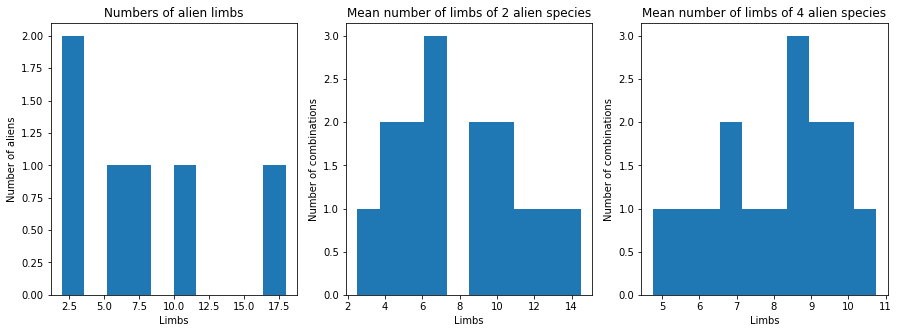

Histograms of the number of limbs of various alien species on left, and the sample means of limbs when taking samples of 2 species (in the middle) and samples of 4 species (on the right).


In [10]:
fig,MeanPlot = plt.subplots(1,3, figsize=(15,5))
MeanPlot[0].hist(limbs)
MeanPlot[0].set_title('Numbers of alien limbs')
MeanPlot[0].set_xlabel('Limbs')
MeanPlot[0].set_ylabel('Number of aliens')

MeanPlot[1].hist(np.mean(comb2, axis = 1))
MeanPlot[1].set_title('Mean number of limbs of 2 alien species')
MeanPlot[1].set_xlabel('Limbs')
MeanPlot[1].set_ylabel('Number of combinations')

MeanPlot[2].hist(np.mean(comb4, axis = 1))
MeanPlot[2].set_title('Mean number of limbs of 4 alien species')
MeanPlot[2].set_xlabel('Limbs')
MeanPlot[2].set_ylabel('Number of combinations')

plt.show()
print('Histograms of the number of limbs of various alien species on left, and the sample means of limbs when taking samples of 2 species (in the middle) and samples of 4 species (on the right).')

----
I'd expect the shape of the sample means distribution starts getting closer to a normal ditribution when the sample size increases, but with the small population size it's hard to say from the figure above

----